<h1 style="background-color:red;color:yellow;padding:10px">mahmoud helal amen</h1>

In [9]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ ------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\7oda0\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [22]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (2).csv


In [1]:
import pandas as pd
df = pd.read_csv('spam.csv',encoding='latin-1')

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4']).rename(columns={'v1': 'category', 'v2': 'message'})

In [4]:
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h1>preprocessing</h1>

In [5]:
df = df.dropna()  # remove missing values
df = df.drop_duplicates()  # remove duplicate messages


In [6]:
#2. convert text to lowercase
df['message'] = df['message'].str.lower()



In [7]:
#remove special characters, numbers, & punctuation
import re
df['message'] = df['message'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


In [8]:
#remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\7oda0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab') # Download the 'punkt_tab' resource for sentence tokenization

df['message'] = df['message'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\7oda0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
#lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' resource
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['message'] = df['message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\7oda0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
df['category'] = df['category'].map({'spam': 1, 'ham': 0})

In [12]:
df.head()

,category,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


<h1>TF IDF feature extraction</h1>

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])  # Transform messages into numerical vectors
y = df['category']  # Target labels (spam/ham)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1>Logistic regression</h1>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)  # Predictions on training set
y_pred_test = model.predict(X_test)  # Predictions on test set

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 96.08%
Testing Accuracy: 94.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       889
           1       0.93      0.64      0.76       145

    accuracy                           0.94      1034
   macro avg       0.94      0.82      0.86      1034
weighted avg       0.94      0.94      0.94      1034



<h1>Naive Bayes</h1>

In [16]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_train = model_nb.predict(X_train)  # Predictions on training set
y_pred_test = model_nb.predict(X_test)  # Predictions on test set

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 96.86%
Testing Accuracy: 96.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.74      0.85       145

    accuracy                           0.96      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



<h1>Random Forest</h1>

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_train = model_rf.predict(X_train)  # Predictions on training data
y_pred_test = model_rf.predict(X_test)  # Predictions on test data

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 100.00%
Testing Accuracy: 96.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



<h1>LSTM</h1>

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
from tensorflow.keras.callbacks import EarlyStopping
# Get the actual number of features from X_train
num_features = X_train.shape[1]

# Define LSTM model
model_lstm = Sequential([
    Reshape((num_features, 1), input_shape=(num_features,)),  # Reshape using num_features
    LSTM(64, return_sequences=True),  # First LSTM layer
    LSTM(32),  # Second LSTM layer
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])
loss, test_accuracy = model_lstm.evaluate(X_test, y_test) # Evaluate using model_lstm
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
train_loss, train_accuracy = model_lstm.evaluate(X_train, y_train) # Evaluate using model_lstm
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
y_pred = model_lstm.predict(X_test).round().astype("int32")
print("LSTM Model Performance:")
print(classification_report(y_test, y_pred))


C:\Users\7oda0\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 459s 7s/step - accuracy: 0.8764 - loss: 0.5193 - val_accuracy: 0.8598 - val_loss: 0.4062
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 449s 7s/step - accuracy: 0.8855 - loss: 0.3725 - val_accuracy: 0.8598 - val_loss: 0.4058
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 470s 7s/step - accuracy: 0.8842 - loss: 0.3668 - val_accuracy: 0.8598 - val_loss: 0.4056
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 459s 7s/step - accuracy: 0.8784 - loss: 0.3786 - val_accuracy: 0.8598 - val_loss: 0.4056
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 454s 7s/step - accuracy: 0.8790 - loss: 0.3770 - val_accuracy: 0.8598 - val_loss: 0.4069
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 802ms/step - accuracy: 0.8505 - loss: 0.4229
Test Accuracy: 85.98%
130/130 ━━━━━━━━━━━━━━━━━━━━ 103s 788ms/step - accuracy: 0.8707 - loss: 0.3852
Training Accuracy: 87.71%
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 763ms/step
LSTM Model Performance:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92   

C:\Users\7oda0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\7oda0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\7oda0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<h1>Roc curve and confusion matrix for each model</h1>


Logistic Regression Confusion Matrix:
[[882   7]
 [ 52  93]]


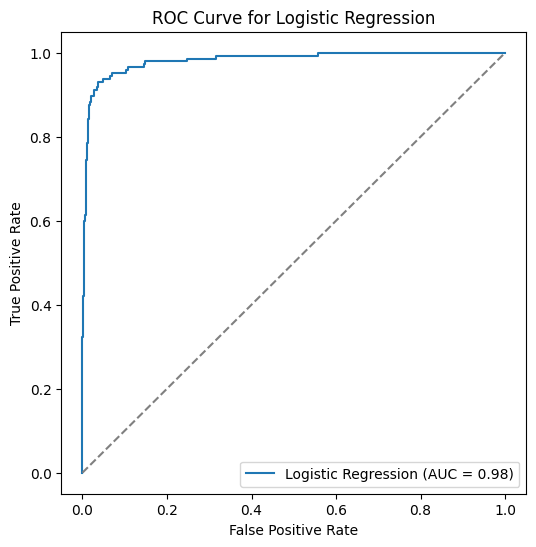


Naïve Bayes Confusion Matrix:
[[889   0]
 [ 38 107]]


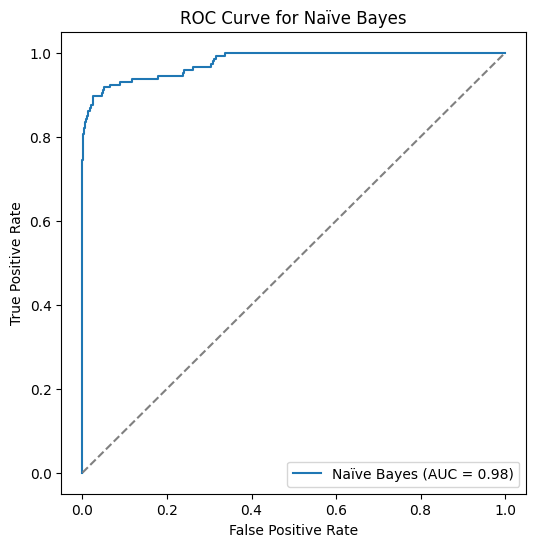


Random Forest Confusion Matrix:
[[889   0]
 [ 34 111]]


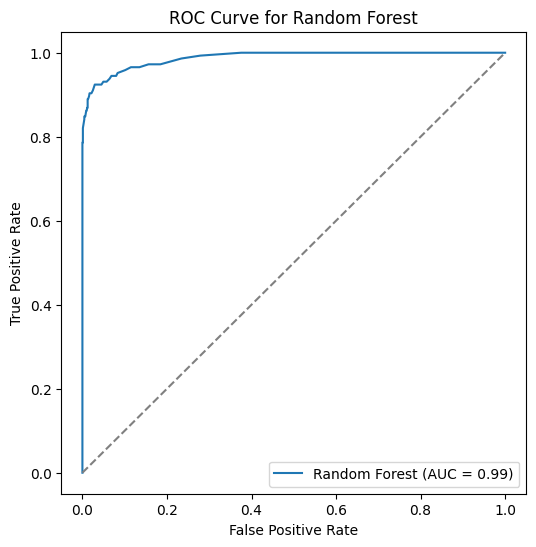

33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 756ms/step

LSTM Confusion Matrix:
[[889   0]
 [145   0]]


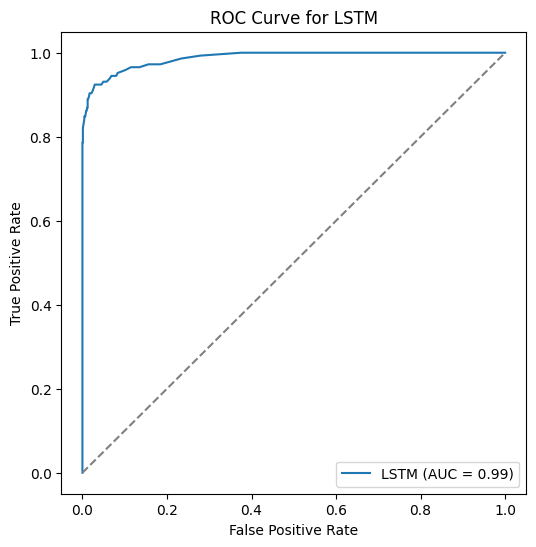

In [19]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": model,
    "Naïve Bayes": model_nb,
    "Random Forest": model_rf,
    "LSTM": model_lstm
}

for name, model in models.items():
    if name == "LSTM":
        y_pred_prob = model.predict(X_test).flatten()  # Ensure 1D array for ROC curve
        y_pred_test = (y_pred_prob > 0.5).astype("int32")  # Apply threshold for classification
    else:
        y_pred_test = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for spam (class 1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    print(f"\n{name} Confusion Matrix:")
    print(conf_matrix)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,6))  # Create a new figure for each model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend()
    plt.show()  # Ensure separate plots for each model




